In [27]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [28]:
# load and read dataset into dataframe
diabetes_df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
diabetes_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [29]:
# load and read PCA dataset into dataframe
diabetes_PCA = pd.read_csv('/content/drive/MyDrive/pca14components_dataframe.csv')
diabetes_PCA.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,Principal Component 11,Principal Component 12,Principal Component 13,Principal Component 14
0,-0.663179,0.563479,-0.227828,1.611341,1.838534,-0.052714,-0.915495,-0.228044,-0.449626,-0.282285,0.084319,-1.002519,-0.400307,-0.780302
1,0.631753,-2.296533,1.352341,0.880647,-0.566834,-0.587175,-1.662966,-0.997945,1.477662,0.725809,-0.630114,1.836536,3.093588,0.939702
2,-2.419809,-0.996149,-0.670329,0.346027,-0.121505,-0.308291,-0.832243,0.252927,-0.302315,0.120319,-0.857461,-0.987027,0.259850,0.207232
3,-0.793413,-1.978981,0.073973,1.094408,-0.169282,0.909632,0.550611,0.425481,-0.503944,-0.764066,-0.309696,0.255616,0.894181,0.247544
4,-2.022314,0.106293,-0.693872,-0.050829,-0.423414,-0.699687,0.304350,0.459423,-0.814908,0.292031,0.130873,0.932465,0.088737,0.525399


In [30]:
# defining feature matrix and target vector
# features are taken from the PCA dataframe
X = diabetes_PCA
print(X)
# target vector taken from the original dataframe
y = diabetes_df['Diabetes_binary']
print(y)

       Principal Component 1  Principal Component 2  Principal Component 3  \
0                  -0.663179               0.563479              -0.227828   
1                   0.631753              -2.296533               1.352341   
2                  -2.419809              -0.996149              -0.670329   
3                  -0.793413              -1.978981               0.073973   
4                  -2.022314               0.106293              -0.693872   
...                      ...                    ...                    ...   
70687               0.906133               1.199776               0.368920   
70688               1.170699              -1.186205               0.627845   
70689               2.922618              -1.339822              -0.582586   
70690               2.365690              -0.087183               1.671256   
70691               0.128852              -1.230224               0.165276   

       Principal Component 4  Principal Component 5  Principal 

In [31]:
# Splitting data into training and test datasets (75/25)
# setting random_state in order ot ensure reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [32]:
# cross-validation to find best k
from sklearn.model_selection import cross_val_score
k_values = [i for i in range(1,31)]
scores = []

# create KNN model based on each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))

In [33]:
# find the best k value based on best score
best_index = np.argmax(scores)
best_k = k_values[best_index]
print("Best k value based on cross-validation: ", best_k)

Best k value based on cross-validation:  27


In [34]:
# creating the KNN model based on best k value
knn = KNeighborsClassifier(n_neighbors=best_k)
# fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [35]:
# predicting y values using KNN model
y_pred = knn.predict(X_test)

In [36]:
# Evaluation of model
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)
print("ROC AUC: ", roc_auc)
print()
report = metrics.classification_report(y_test, y_pred)
print("Classification Report: \n", report)

Accuracy:  0.7356985231709388
Precision:  0.71294405879951
Recall:  0.7897772249236684
F1 Score:  0.7493964268469337
ROC AUC:  0.7356587143870891

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.76      0.68      0.72      8830
         1.0       0.71      0.79      0.75      8843

    accuracy                           0.74     17673
   macro avg       0.74      0.74      0.73     17673
weighted avg       0.74      0.74      0.73     17673



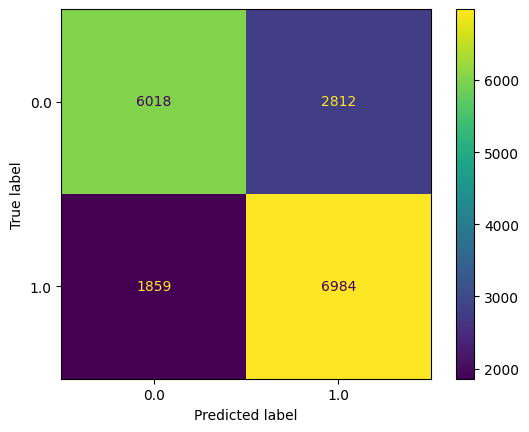

In [37]:
# visualizing confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [38]:
# Hyperparameter tuning
# using GridSearch
param_grid = {'n_neighbors': k_values}

knn2 = KNeighborsClassifier()

knn_grid_search = GridSearchCV(knn2, param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)

best_param = knn_grid_search.best_params_['n_neighbors']
best_score = knn_grid_search.best_score_

In [39]:
print("Best K- value based on Grid Search: ", best_param)
print("Best score value: ", best_score)

Best K- value based on Grid Search:  27
Best score value:  0.7362454801568761


In [40]:
# creating the KNN model based on tuned hyperparameter
knn3 = KNeighborsClassifier(n_neighbors=best_param)
# fitting the updated model
knn3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [41]:
# predicting y values
y_pred2 = knn3.predict(X_test)

In [42]:
# Evaluation for updated model
accuracy = metrics.accuracy_score(y_test, y_pred2)
precision = metrics.precision_score(y_test, y_pred2)
recall = metrics.recall_score(y_test, y_pred2)
f1_score = metrics.f1_score(y_test, y_pred2)
roc_auc = metrics.roc_auc_score(y_test, y_pred2)

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1_score)
print('ROC AUC: ', roc_auc)
print()
report = metrics.classification_report(y_test, y_pred2)
print('Classification Report: \n', report)

Accuracy:  0.7356985231709388
Precision:  0.71294405879951
Recall:  0.7897772249236684
F1 Score:  0.7493964268469337
ROC AUC:  0.7356587143870891

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.76      0.68      0.72      8830
         1.0       0.71      0.79      0.75      8843

    accuracy                           0.74     17673
   macro avg       0.74      0.74      0.73     17673
weighted avg       0.74      0.74      0.73     17673

